# Betting strategies 
# _England Premiere League Match Results & Odds Dataset_

## I. Introduction

> You do not know anything about sports betting or you want to implement a new strategy? This notebook will help you understand this world, and also provide you a **betting strategy** that you will be able to apply on your own.

In this report, we will take the example of Football, one of the sports with the highest number of bets. More precisely, we will concentrate on **England Premiere League match results**, because its great number of matches will allow us to test and build a strategy.

### Explanations on betting's vocabulary
First, let's set up the vocabulary. While betting,  _odds_ are linked to each bet you make. Betting odds tell you how likely an event is to happen, and represents how much money you could win if your bet realizes itself.

> For example, you are on a betting website. If the odd is set as 1.40 for "Home team win" and you put 10€ on this odd, if the Home team actually wins (so your prediction realizes itself), you will earn 4€ and get back your first 10€.

There is the possibility to bet on different type of results before a match. Here, we will take into account the bets on the match result (Home team wins, Away team wins, Draw match).


## II. Dataset & Variables

The dataset we chose groups the results of the English Premier League matches **from 2008 to 2019**. It was taken from the following website:
We also added some features to this dataset, taken from this website:

The variables available are about the matches: the match's **ID**, the match's **date time**, the **Home team**, the **Away team**, the final **number of goals**, the **match result** (Home Team win, Away Team win or Draw Match), the **team's ranking** of the previous Football season (static rank at the end of the past season), the **referee** for the match, the number of **shots**, the number of **fouls**, and the other variables are not directly linked to the match statistics. These other variables are **the odds set before the match** by **different betting websites**. These odds are set on the **final result** of a match (Home Team win, Away Team win, Draw Match).

## III. Goal of the project & models

The goal of the project is to build a model that can predict the following output : Home Team win, Away Team win or Draw match.
Of course, the model will not predict perfectly the output, but by knowing which match result have the most chances to happen can create some winning bets. This will be done through **Classifications** models.

We decided to build two models, taking into acount different independant variables: 
- One time, we will try to predict a match result based on the **betting websites' predictions**, that can be seen **through the odds** websites put on the possible result. 

- Another time we will use the **Match Statistics**, with the rank of each team, the number of shots/fouls, the number of goals, etc. 

In order to obtain these predictions, we will also try two classifications models: **Descision Trees** and **Logistic Regressions**. 

> In the end, we will evaluate the relevance of each classification model, and also define **which independant variables** (Odds or Statitics of the Match) **explained the best the Match Result**.

## IV. Methodology

1. At first, we will import the packages that we will need during this analyse.
2. Then, we will upload, clean and add the necessary variables to complete the Dataset.
3. Some variables will be transformed the variables in a way we can use them properly.
4. Following this point, we will create scatter plots to show the repartition between the realized prediction vs non realized prediction. (When the match Odd is set on Home win => 0 the match result is Home did not win, 1 when Home won) 
5. Consequently, we will create the classification models (Logistic regression, then decision trees). It will be done for each match result, using one time the match statistics, the other time using the odds. 
6. We will also evaluate the accuracy of the models and create confusion matrixes to have a visual representation of the project.
7. Finally, we will draw some conclusions that we can be retrieved from these classfications and methodologies.

> We will also analyse our models and try to tink about how we could improve them and how they could be useful for business.


## 1. Packages

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")

## 2. The dataset

The following table shows the 10 first rows of the dataset. It was uploaded from a csv file, and we decided yo name it **_data_**.

In [2]:
#We use the Dataset with the games of the season 2008 to 2018
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/England_2008_2018_Premiere_League_Final.csv',sep=";")

# view of the first rows 
data


,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(4180, 70)

As we can see, we have some _NaN_ variables in our data due to a format change, so we have to remove them.

In [4]:
data = data.drop(["Unnamed: 49", "Unnamed: 50", "Unnamed: 51","Unnamed: 52","Unnamed: 53","Unnamed: 54","Unnamed: 55","Unnamed: 56","Unnamed: 57","Unnamed: 58","Unnamed: 59","Unnamed: 60","Unnamed: 61","Unnamed: 62","Unnamed: 63","Unnamed: 64","Unnamed: 65","Unnamed: 66","Unnamed: 67","Unnamed: 68","Unnamed: 69"], axis=1)

#We have a new dimension
data.shape

(4180, 49)

In [5]:
data

,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Home Team Goals,Away ex-Rank,Away Team Goals,Match Result,Referee,...,Betbrain Average Home,Betbrain Maximum Draw,Betbrain Average Draw,Betbrain Maximum Away,Betbrain Average Away,Betbrain Numbers of bookmakers Goals,Betbrain Max > 2.5 Goals,Betbrain Average > 2.5 Goals,Betbrain Max < 2.5 Goals,Betbrain Average < 2.5 Goals
0,1,16.08.08,Arsenal,West Brom,6,1,18,0,H,H Webb,...,1.22,6.25,5.60,17.00,13.52,37,1.71,1.65,2.25,2.14
1,2,16.08.08,Bolton,Stoke,16,3,19,1,H,C Foy,...,1.81,3.51,3.35,5.30,4.54,37,2.33,2.16,1.70,1.64
2,3,16.08.08,Everton,Blackburn,5,2,7,3,A,A Marriner,...,1.98,3.39,3.25,4.21,3.86,37,2.34,2.17,1.70,1.63
3,4,16.08.08,Hull,Fulham,20,2,17,1,H,P Walton,...,2.56,3.38,3.23,2.89,2.68,37,2.32,2.15,1.69,1.64
4,5,16.08.08,Middlesbrough,Tottenham,13,2,11,1,H,M Atkinson,...,3.19,3.55,3.31,2.30,2.20,37,1.90,1.81,2.12,1.92
5,6,16.08.08,Sunderland,Liverpool,15,0,4,1,A,A Wiley,...,5.24,3.75,3.50,1.76,1.68,37,2.22,2.08,1.76,1.69
6,7,16.08.08,West Ham,Wigan,10,2,14,1,H,S Bennett,...,1.94,3.40,3.27,4.40,3.98,37,2.22,2.10,1.75,1.68
7,8,17.08.08,Aston Villa,Man City,6,4,9,2,H,P Dowd,...,1.84,3.55,3.32,5.05,4.36,34,2.33,2.12,1.73,1.66
8,9,17.08.08,Chelsea,Portsmouth,2,4,8,0,H,M Dean,...,1.32,5.20,4.69,12.00,10.05,36,2.01,1.90,1.93,1.83
9,10,17.08.08,Man United,Newcastle,1,1,12,1,D,M Riley,...,1.28,5.50,5.03,13.00,11.00,36,1.83,1.72,2.20,2.03



We have also seen that some rows were showing _NaN_ data due to missing odds, so we removed them too.

In [6]:
data.dropna(inplace=True)
data.shape

(4176, 49)

Finally, this dataset (without the _NaN_ ) counts **4'176** rows for **49** columns.


In [7]:
data = data.drop(["Home Team Goals","Away Team Goals","Betbrain Numbers of bookmakers 1X2","Betbrain Average Home","Betbrain Maximum Draw","Betbrain Average Draw","Betbrain Maximum Away","Betbrain Average Away","Betbrain Numbers of bookmakers Goals","Betbrain Max > 2.5 Goals","Betbrain Average > 2.5 Goals","Betbrain Max < 2.5 Goals","Betbrain Average < 2.5 Goals"], axis=1)
data

,Match_ID,Date,HomeTeam,AwayTeam,Home ex-Rank,Away ex-Rank,Match Result,Referee,Home Team Shots,Away Team Shots,...,Interwetten Home,Interwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away,Betbrain Maximum Home
0,1,16.08.08,Arsenal,West Brom,6,18,H,H Webb,24,5,...,1.20,5.20,11.00,1.17,5.50,12.00,1.25,6.00,13.00,1.26
1,2,16.08.08,Bolton,Stoke,16,19,H,C Foy,14,8,...,1.75,3.30,4.20,1.80,3.10,4.00,1.85,3.40,4.80,1.87
2,3,16.08.08,Everton,Blackburn,5,7,A,A Marriner,10,15,...,2.00,3.20,3.30,1.95,3.10,3.50,2.05,3.30,4.00,2.06
3,4,16.08.08,Hull,Fulham,20,17,H,P Walton,11,12,...,2.40,3.20,2.60,2.50,2.90,2.62,2.60,3.40,2.80,2.70
4,5,16.08.08,Middlesbrough,Tottenham,13,11,H,M Atkinson,14,8,...,2.90,3.20,2.20,2.90,3.20,2.15,3.20,3.40,2.30,3.57
5,6,16.08.08,Sunderland,Liverpool,15,4,A,A Wiley,6,14,...,4.50,3.50,1.65,5.50,3.30,1.57,5.50,3.80,1.65,5.91
6,7,16.08.08,West Ham,Wigan,10,14,H,S Bennett,15,22,...,1.80,3.30,3.80,1.83,3.20,3.75,1.90,3.50,4.35,2.09
7,8,17.08.08,Aston Villa,Man City,6,9,H,P Dowd,14,13,...,2.00,3.20,3.30,1.91,3.20,3.50,1.90,3.50,4.35,2.00
8,9,17.08.08,Chelsea,Portsmouth,2,8,H,M Dean,18,12,...,1.30,4.40,8.50,1.30,4.20,8.50,1.33,5.00,11.00,1.36
9,10,17.08.08,Man United,Newcastle,1,12,D,M Riley,18,11,...,1.30,4.40,8.50,1.25,4.50,10.00,1.28,5.50,12.00,1.32


## 3. Changing variables types

Now, as we settled up the **types of the variables**. We will change some as int (integer), the date as datetime, while other will remain objects.

In [8]:
data.dtypes

Match_ID                       int64
Date                          object
HomeTeam                      object
AwayTeam                      object
Home ex-Rank                   int64
Away ex-Rank                   int64
Match Result                  object
Referee                       object
Home Team Shots                int64
Away Team Shots                int64
Home Team Shots on Target      int64
Away Team Shots on Target      int64
Home Fouls Committed           int64
Away Fouls Committed           int64
Home Corners                   int64
Away Corners                   int64
Home Yellow Cards              int64
Away Yellow Cards              int64
Home Red Cards                 int64
Away Red Cards                 int64
B365 Home                    float64
B365 Draw                    float64
B365 Away                    float64
Bet&Win Home                 float64
Bet&Win Draw                 float64
Bet&Win Away                 float64
Interwetten Home             float64
I

In [9]:
#We have to change the type of some variable (integer)
data['Match_ID'] = data.Match_ID.astype(int)

In [10]:
#We have to change the type of some variable (integer)
data[['Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)

In [11]:
#We have to change the type of some variable (Date)
data['Date'] = pd.to_datetime(data['Date'],)


In [12]:
data.dtypes

Match_ID                              int32
Date                         datetime64[ns]
HomeTeam                             object
AwayTeam                             object
Home ex-Rank                          int64
Away ex-Rank                          int64
Match Result                         object
Referee                              object
Home Team Shots                       int32
Away Team Shots                       int32
Home Team Shots on Target             int32
Away Team Shots on Target             int32
Home Fouls Committed                  int32
Away Fouls Committed                  int32
Home Corners                          int32
Away Corners                          int32
Home Yellow Cards                     int32
Away Yellow Cards                     int32
Home Red Cards                        int32
Away Red Cards                        int32
B365 Home                           float64
B365 Draw                           float64
B365 Away                       


## 4. Tendencies through scatter plots

A match has 3 different possible results (the Home Team wins, the Away Team wins or a Draw match). Each of these results are likely to happen, or not happen. This fact shows **the need of a binary variable**, for each of the match result (Home, Away or Draw).

In [13]:
#We wo, one for the Home team wins, one for the draws and one for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])

To build a betting strategy, it is first relevant to know how frequently the betting companies makes right predicting or not. So, in order to understand this fact, we will build **three different scatter plot**, showing the realised and not realised predictions :

- When the official result is the victory of the home team crossed with the "Home team win" odd.
- When the official result is the victory of the away team crossed with the "Away team win" odd.
- When the official result is draw match crossed with the "Draw"odd.

We will build scatter plots for each of the 3 differents possible results we have in a match, and compare them with the odds.

### Home team wins scenario: if the Home team wins the output is 1,  otherwise it's 0.

In [14]:
# number of Homewin vs No Home win
Homewin = data["Match Result_H"].value_counts()[1]
NoHomewin = data["Match Result_H"].value_counts()[0]
print("Home won:", Homewin)
print("Home did not win:", NoHomewin)

Home won: 1929
Home did not win: 2247


The most common class is the Home Team did not win so we use it for calculate the **base rate**.

In [15]:
# Base rate 
# the base rate of the No Home Win
BaseRate = NoHomewin/data['Match Result_H'].count()
print("Base Rate:", BaseRate)

Base Rate: 0.5380747126436781


### Interpretation:
We can see that we have an almost 50-50 repartition between the Match results Home win vs No Home win. 53% of the time the Home team does not win.

[Text(0, 0.5, 'Home team won [1]'),
 Text(0.5, 0, 'Website Odd while Home Team wins')]

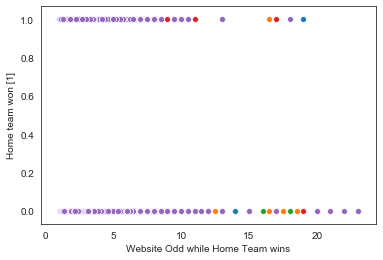

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


#tips = sns.load_dataset(data)

a_B365_Home = sns.scatterplot(x="B365 Home", y="Match Result_H", data=data)

a_BetWin_Home = sns.scatterplot(x="Bet&Win Home", y="Match Result_H", data=data)

a_Interwetten_Home = sns.scatterplot(x="Interwetten Home", y="Match Result_H", data=data)

a_WilliamHill_Home = sns.scatterplot(x="William Hill Home", y="Match Result_H", data=data)

a_VCBet_Home = sns.scatterplot(x="VC Bet Home", y="Match Result_H", data=data)

a_VCBet_Home.set(xlabel='Website Odd while Home Team wins', ylabel='Home team won [1]')


As we can see the higher the odd is, the less a team has chance to win. However, it still happens sometimes, like the 5 cases where people won more than 13 times their first bet.


### Draw match scenario: if the result is draw, the output is 1,  otherwise it's 0.

In [17]:
# number of Draw vs No Draw
Draw = data["Match Result_D"].value_counts()[1]
NoDraw = data["Match Result_D"].value_counts()[0]
print("Draw match:", Draw)
print("No Draw match:", NoDraw)

Draw match: 1037
No Draw match: 3139


In [18]:
# Base rate 
# the base rate of the No Draw
BaseRateD = NoDraw/data['Match Result_D'].count()
print("Base Rate", BaseRateD)

Base Rate 0.751676245210728


### Interpretation: 
We can see that we have an almost 75-25 repartition. So 75% of the matches does not end as draw.

[Text(0, 0.5, 'Draw [1]'), Text(0.5, 0, 'Website Odd while Draw match')]

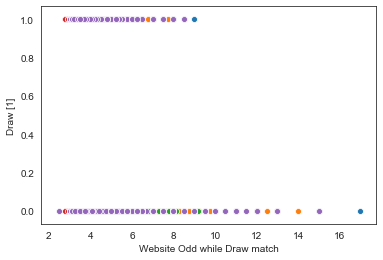

In [19]:
a_B365_Draw = sns.scatterplot(x="B365 Draw", y="Match Result_D", data=data)

a_BetWin_Draw = sns.scatterplot(x="Bet&Win Draw", y="Match Result_D", data=data)

a_Interwetten_Draw = sns.scatterplot(x="Interwetten Draw", y="Match Result_D", data=data)

a_WilliamHill_Draw = sns.scatterplot(x="William Hill Draw", y="Match Result_D", data=data)

a_VCBet_Draw = sns.scatterplot(x="VC Bet Draw", y="Match Result_D", data=data)

a_VCBet_Draw.set(xlabel='Website Odd while Draw match', ylabel='Draw [1]')

We can observe the same trend as the previous graph for the small odds. However, the high odds just never realize themselves, it stays below 10.


### Away team wins scenario: if the Away team wins the output is 1,  otherwise it's 0.

In [20]:
# number of Away win vs No Away win
Awaywin = data["Match Result_A"].value_counts()[1]
NoAwaywin = data["Match Result_A"].value_counts()[0]
print("Away won:", Awaywin)
print("Away did not win:", NoAwaywin)

Away won: 1210
Away did not win: 2966


In [21]:
# Base rate 
# the base rate of the No Home Win
BaseRateA = NoAwaywin/data['Match Result_A'].count()
print("Base Rate", BaseRateA)

Base Rate 0.7102490421455939


### Interpretation:
We can see that we have a almost 70-30 repartition. So 71% of the time, the away team does not win.

[Text(0, 0.5, 'Away team won [1]'),
 Text(0.5, 0, 'Website Odd while Away Team wins')]

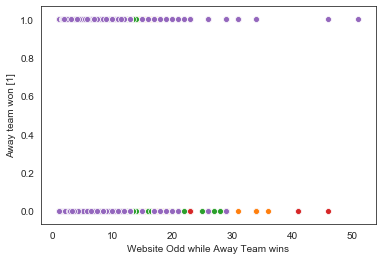

In [22]:
a_B365_Away = sns.scatterplot(x="B365 Away", y="Match Result_A", data=data)

a_BetWin_Away = sns.scatterplot(x="Bet&Win Away", y="Match Result_A", data=data)

a_Interwetten_Away = sns.scatterplot(x="Interwetten Away", y="Match Result_A", data=data)

a_WilliamHill_Away = sns.scatterplot(x="William Hill Away", y="Match Result_A", data=data)

a_VCBet_Away = sns.scatterplot(x="VC Bet Away", y="Match Result_H", data=data)

a_VCBet_Away.set(xlabel='Website Odd while Away Team wins', ylabel='Away team won [1]')


We can observe the same trend as the previous graph for the small odds. However, high odds do realizes themselves and more frequently than for Home win. While for home win we only have a few (<10) between [10;20], for Away win there are a lot more of odds realizing themselves (>15) between [10;50].


In [23]:
sum = 1 - BaseRate + 1- BaseRateD + 1 - BaseRateA
print(sum)

0.9999999999999999


If we sum all the percentage of _1 - Base rate_ we obtain 0,999, so the distribution tends to 1 and is almost perfect.


## 5. Comparison between two Classification models using the odds

We will compare two model:

> - **Logistic Regressions**: comparing the **Odd prediction** to the **Statistics of the match prediction**
> - **Decision Trees**: comparing the **Odd prediction** to the **Statistics of the match prediction**


Before building the models, we will **normalise** the odds numbers to create a common scale for all the odds.


In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Interwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']

scaler = MinMaxScaler()
data[cols_to_norm] = scaler.fit_transform(data[cols_to_norm])


data[cols_to_norm].head(10)

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Interwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.006381,0.250000,0.348044,0.008521,0.234234,0.254373,0.007916,0.248619,0.354376,0.006015,0.264706,0.242424,0.009112,0.280,0.237866
1,0.035096,0.035714,0.084754,0.035088,0.036036,0.093777,0.036939,0.038674,0.110473,0.037594,0.029412,0.064171,0.036446,0.072,0.073406
2,0.042844,0.021429,0.072217,0.040100,0.031532,0.082306,0.050132,0.027624,0.078192,0.045113,0.029412,0.053030,0.045558,0.064,0.057361
3,0.070191,0.014286,0.042126,0.070175,0.022523,0.043590,0.071240,0.027624,0.053085,0.072682,0.009804,0.033422,0.070615,0.072,0.033293
4,0.097539,0.028571,0.028335,0.087719,0.027027,0.033553,0.097625,0.027624,0.038737,0.092732,0.039216,0.022950,0.097950,0.072,0.023265
5,0.202370,0.042857,0.013791,0.197995,0.040541,0.015486,0.182058,0.060773,0.019010,0.223058,0.049020,0.010027,0.202733,0.104,0.010229
6,0.038742,0.028571,0.077232,0.042607,0.027027,0.076570,0.039578,0.038674,0.096126,0.039098,0.039216,0.058601,0.038724,0.080,0.064380
7,0.038742,0.028571,0.080491,0.045113,0.027027,0.070835,0.050132,0.027624,0.078192,0.043108,0.039216,0.053030,0.038724,0.080,0.064380
8,0.012306,0.142857,0.222668,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.012531,0.137255,0.164439,0.012756,0.200,0.197754
9,0.010483,0.178571,0.247743,0.012531,0.166667,0.204187,0.013193,0.160221,0.264706,0.010025,0.166667,0.197861,0.010478,0.240,0.217810


## 5.1 Logistic Regression

### I. With the odds

>We will first build 3 models based on the odds, one for each possible game results (Home win, Away win, Draw), using a **Logistic Regression**.

Here is **the 1st logistic regression for Home Team Win:**

In [25]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)


In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [28]:
LR.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [29]:
# best regulariser parameter
LR.C_

array([0.04641589])

In [30]:

LR.score(X_train,y_train)

0.6422155688622755

The train set accuracy is about 64%. So this model predict correclty 64% of the cases where the output is a Home win or not. We had a default rate of almost 46% for the Home win, which is not a very good prediction but it still allows to predict something significant.

In [31]:

LR.score(X_test, y_test)

0.6016746411483254

The test set accuracy is about 60%. Unfortunately, the prediction based on the test set are less good than the train set. We could optimize it by doing a Cross Validation.

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR.predict(X_train))

array([[1209,  572],
       [ 623,  936]], dtype=int64)

### Confusion Matrix

We can already see the repartition of results and predictions, but just below the confusion matrix shows it in a more readable way:

Confusion matrix, without normalization


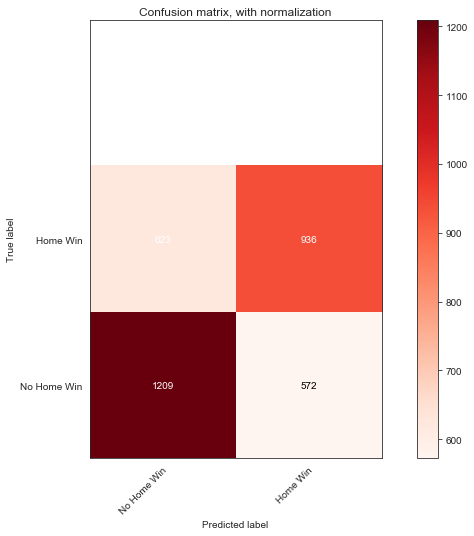

In [33]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home Win", "Home Win"])
    ax.yaxis.set_ticklabels(["No Home Win", "Home Win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')


### Interpretation
> We can see we have a majority of True Negative (Prediction = No Home win and reality No Home Win) and True Positive (Prediction Home win and reality Home win), which is coherent with the result we found above. The matrix allows us to have a better visual understanding.

In [34]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)



0.6206896551724138
0.600384862091084


### Interpretation of the precision recall:

> - We have a precision of 62.06%. So, over all the predicted _Home wins_ , we have 62% of them that were really _Home wins_.
> - Only 60.04% of the _Home wins_ have been correctly identified.


**Here is the 2nd logistic regression for Draws:**

In [35]:
feature_names = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [37]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [38]:
LRD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [39]:
# best regulariser parameter
LRD.C_

array([0.])

Here the Logistic Regression cannot provide a result, which is probably due to the data distribution between the train and test set. We could create a sample to maybe resolve this issue.

In [40]:
# train accuracy
LRD.score(X_train,y_train)

0.7547904191616767

The train set accuracy is about 75.48%, the model predict correclty 75.48% if it was a Draw or not.

In [41]:
# test accuracy
LRD.score(X_test, y_test)

0.7392344497607656

Almost the same as for the train accuracy. If we compare the test accuracy (73,9%) to the base rate (71%), it is not a relevant prediction.

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRD.predict(X_train))

array([[2521,    0],
       [ 819,    0]], dtype=int64)

Confusion matrix, with normalization


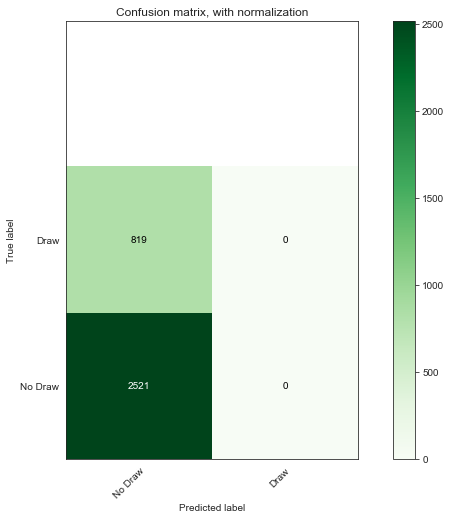

In [43]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation
> We can see that this confusion matrix shows no True Positive and no False Positive. This is due to the fact that the proportion of Draw are too small comparing to the total number of games, and the Train/Test split with the Logistic regression model cannot show any result. So, we decided to drop this Logistric regression model for the draws matches.

In [44]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.0
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Here is the 3rd logistic regression for Away wins:

In [45]:
feature_names = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [47]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LRA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [48]:
LRA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [49]:
# best regulariser parameter
LRA.C_

array([0.])

In [50]:
# train accuracy
LRA.score(X_train,y_train)

0.7119760479041917

In [51]:
# test accuracy
LRA.score(X_test, y_test)

0.7033492822966507

#### Interpretation

Same observation as for the draw, our accuracy rate of the training and the test set are to close to the base rate so we cannot use this model to predict an Away win or not.

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LRA.predict(X_train))

array([[2378,    0],
       [ 962,    0]], dtype=int64)

Confusion matrix, with normalization


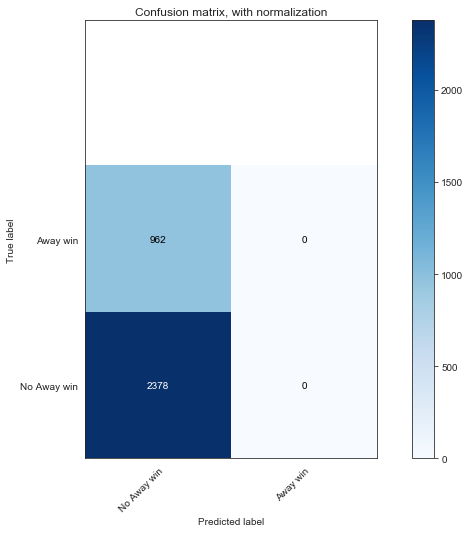

In [53]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LRA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation
> As for the draws, we do not have True Positive anf False Positive, again due to the distribution of Away wins versus no Away wins. As for Draws, we will not analyse further the Logistc Regression for the Away wins. 

In [54]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.0
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### II. With the Match Statistics

>We will now build 3 models based on the games' statistics, one for each possible game results (Home win, Away win, Draw), using a **Logistic Regression**. 

__Note:__ We did not know how to use the previous game statistics (the match before the actual one) to do predictions about the result of a game, because we did not know how to use Time Series. So we used the statisics of the actual game to validate the relevance of games'statistics for predictions.

**Logistic Regression for Home win with statistics**


In [55]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [57]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MS = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [58]:
LR_MS.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [59]:
# best regulariser parameter
LR_MS.C_

array([2.78])

In [60]:
# train accuracy
LR_MS.score(X_train,y_train)

0.7143712574850299

In [61]:
# test accuracy
LR_MS.score(X_test, y_test)

0.6854066985645934

### Interpretation:
This equation with match's statistics gave a better accuracy for the training set and the test set than with the Odds prediction for the case of Home win. In comparison to the Default rate (almost 46%) of an Home win, this model shows better the predictions.

# Je suis pas sûre d'avoir compris cette interpretation !

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MS.predict(X_train))

array([[1360,  421],
       [ 533, 1026]], dtype=int64)

Confusion matrix, with normalization


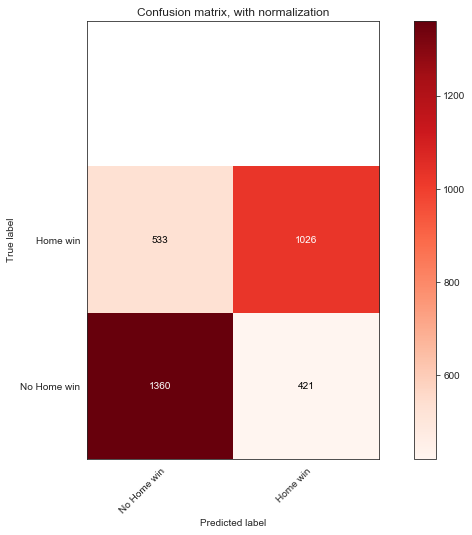

In [63]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MS.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Home win", "Home win"])
    ax.yaxis.set_ticklabels(["No Home win", "Home win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')

### Interpretation

We can see that we have a majority of True Positive and True Negative labels. There are a smaller number of False Positive and False Negative with the Logistic Regression using Match Statistics.

In [64]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)


0.7090532135452661
0.6581141757536882


### Interpretation of the precision recall:

>We have a precision of 70.91%, so over all the predicted Home wins we have 70.91% of them that actually were Home wins.
>Only 65.81% of the Home wins have been correctly identified.

In comparaison to the model using odds, this model shows a better precision and recall using match statistics, and then is more relevant.

**Logistic Regression for Draws with statistics**

In [65]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [67]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSD = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [68]:
LR_MSD.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [69]:
# best regulariser parameter
LR_MSD.C_

array([0.01])

In [70]:
# train accuracy
LR_MSD.score(X_train,y_train)

0.7550898203592814

In [71]:
# test accuracy
LR_MSD.score(X_test, y_test)

0.7380382775119617

### Interpretation
Here we face the same problem that we had with the odds, the training set and test set are to close to the base rate. We cannot use this Logistic Regression Model for draws.

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSD.predict(X_train))

array([[2521,    0],
       [ 818,    1]], dtype=int64)

Confusion matrix, with normalization


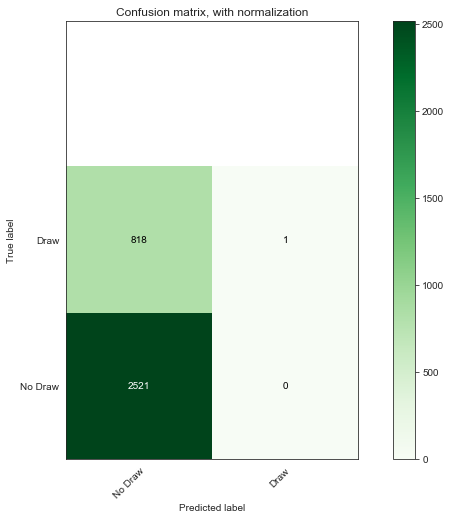

In [73]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSD.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Draw", "Draw"])
    ax.yaxis.set_ticklabels(["No Draw", "Draw"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')

### Interpretation

Due to the distribution of draws and no draws, the model is not able to predict True Positive and False Positive.

In [74]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

1.0
0.001221001221001221


**Logistic Regression for Away win with statistics**

In [75]:
feature_names = ["Home ex-Rank","Home Team Shots","Away ex-Rank", "Away Team Shots","Home Team Shots on Target", "Away Team Shots on Target", "Home Fouls Committed", "Away Fouls Committed", "Home Corners", "Away Corners", "Home Yellow Cards", "Away Yellow Cards", "Home Red Cards", "Away Red Cards"]
#feature_names = ['B365 Home']
X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [77]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# logistic regression with 5 fold cross validation
LR_MSA = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [78]:
LR_MSA.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [79]:
# best regulariser parameter
LR_MSA.C_

array([0.05])

In [80]:
# train accuracy
LR_MSA.score(X_train,y_train)

0.7778443113772455

In [81]:
# test accuracy
LR_MSA.score(X_test, y_test)

0.7595693779904307

### Interpretation:
The accuracy of the training set and the test set are very close to the base rate so let see the confusion matrix to have a better understanding of the situation.

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, LR_MSA.predict(X_train))

array([[2190,  188],
       [ 554,  408]], dtype=int64)

Confusion matrix, with normalization


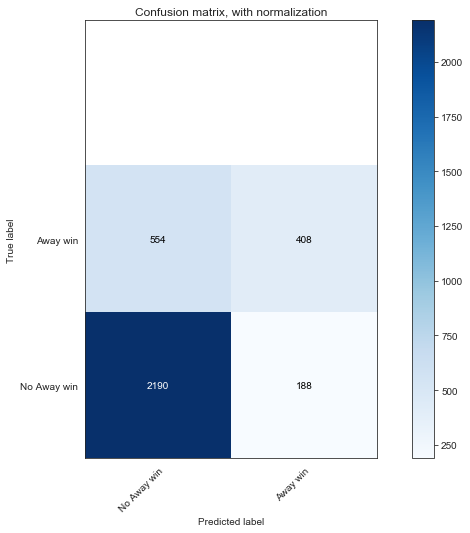

In [83]:
# Normalized confusion matrix, (code from the Lab 5.0)
from sklearn.utils.multiclass import unique_labels

y_pred = LR_MSA.predict(X_train)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    
    ax.xaxis.set_ticklabels(["No Away win", "Away win"])
    ax.yaxis.set_ticklabels(["No Away win", "Away win"])
    return ax


np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_pred, classes = y[unique_labels(y_train, y_pred)],title='Confusion matrix, with normalization')



### Interpretation

Here we have an interesting distribution: in contrary to the model with the odds for Away win, this time the confusion matrix shows some results, even if the base rate is close to the accuracy. Here we have True Positives and False Positives, our model can predict if a game is an away win or not. However, it is still not much precise.

In [84]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


### Interpretation of the precision recall:

>We have a precision of 68.46%, so over all the predicted Away wins we have 70.91% of them that actually were Away wins.
>Only 42.41% of the Away wins have been correctly identified.

In comparison to the model using odds, even if the recall is low, we still have a precision and recall using the match statistics. This model is way more relevant than the one with the odds.

### 5.2 Decision Trees

#### I. With the Odds

**Decision Tree for Home win**

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
feature_names = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home','VC Bet Home']

X = data[feature_names]
y = data["Match Result_H"]


In [87]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [88]:
clf = DecisionTreeClassifier(criterion='entropy')

In [89]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
# test accuracy
clf.score(X_test,y_test)

0.5418660287081339

In [91]:
# depth of the decision tree
Depth = clf.get_depth()
Depth

44

### Interpretation:
We have an accuracy of 54.19%, which is very close to the Base rate. The Depth is also too large, so there is probably an overfitting problem with the model. We have to find the optimal depth to optimize this Decision Tree model for Home wins with the Odds.


In [92]:
#clf = DecisionTreeClassifier(criterion='entropy')
scores = [clf.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

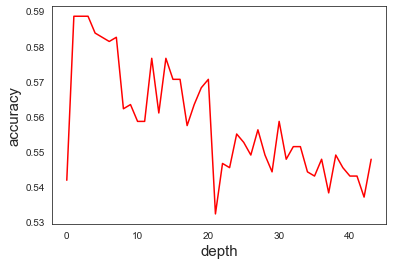

In [93]:
plt.plot(scores,"r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [94]:
Max_Depth = np.argmax(scores)
print("The optimal Depth is", Max_Depth)

The optimal Depth is 1


This graph above shows that the Depth maximizing the best the accuracy is **1**. So it means the best Decision Tree is when the iteration stops after the 1st one.
# verifier avec alex

In [95]:
clfMax = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [96]:
clfMax.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
clfMax.score(X_test,y_test)

0.5885167464114832

We have a better accuracy with the optimization of the Depth. However it is still is lower than the accuracy found with the Logistic Regression (Odds for Home win).

In [98]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.10570469798657718
0.040410519563822966


### Interpretation of the precision recall:

>We have a precision of 10.57%, so over all the predicted Home wins we have 10.57% of them that actually were Home wins.
>Only 4.04% of the Home wins have been correctly identified.

In comparison to the Logistic Regression model, the decision tree is less relevant and it does not allow us to predict the Home wins.

**Decision Tree for Draw**

In [99]:
feature_namesD = ['B365 Draw','Bet&Win Draw','Interwetten Draw','William Hill Draw','VC Bet Draw']

X = data[feature_names]
y = data["Match Result_D"]


In [100]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [101]:
clfD = DecisionTreeClassifier(criterion='entropy')

In [102]:
clfD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [103]:
# test accuracy
clfD.score(X_test,y_test)

0.611244019138756

In [104]:
# depth of the decision tree
Depth = clfD.get_depth()

In [105]:
scores = [clfD.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

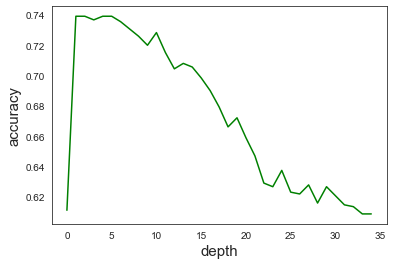

In [106]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [107]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 1


This graph above shows again that the Depth maximizing the best the accuracy is **1**. So it means the best Decision Tree is when the iteration stops after the 1st one.
# verifier avec alex

In [108]:
clfMaxD = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [109]:
clfMaxD.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
clfMaxD.score(X_test,y_test)

0.7392344497607656

In [111]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.20973154362416108
0.15262515262515264


### Interpretation of the precision recall:

>We have a precision of 20.97%, so over all the predicted Draws we have 20.97% of them that actually were Draws.
>Only 15.26% of the Home wins have been correctly identified.

This Decision Tree model is less relevant and we are not able to build good predictions with it, in comparison to the Logistic Regression model.
# LR with odds on a pas de chiffres en vrai ! avec match statistics?

**Decision Tree for Away win**

In [112]:
feature_namesA = ['B365 Away','Bet&Win Away','Interwetten Away','William Hill Away','VC Bet Away']

X = data[feature_names]
y = data["Match Result_A"]


In [113]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [114]:
clfA = DecisionTreeClassifier(criterion='entropy')

In [115]:
clfA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
# test accuracy
clfA.score(X_test,y_test)

0.6471291866028708

In [117]:
# depth of the decision tree
Depth = clfA.get_depth()

In [118]:
scores = [clfA.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

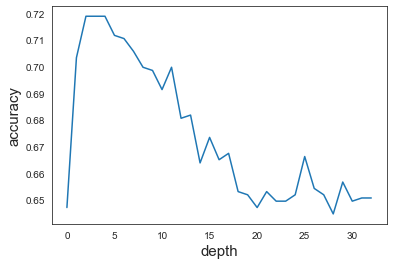

In [119]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [120]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 2


This graph above shows that the Depth maximizing the best the accuracy is **2**. So it means the best Decision Tree is when the iteration stops after the 2nd one.
# verifier avec alex

In [121]:
clfMaxA = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [122]:
clfMaxA.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
clfMaxA.score(X_test,y_test)

0.7188995215311005

In [124]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


### Interpretation of the precision recall:

>We have a precision of 68.46%, so over all the predicted Draws we have 68.46% of them that actually were Draws.
>Only 42.41% of the Home wins have been correctly identified.

The Decision Tree model with Odds predict well the Away wins, compared to the Logistic Regression Model with Odds.

### II. With the Match Statistics

**Match Statistics for Home win**

In [125]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_H"])

In [126]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [127]:
clfHS = DecisionTreeClassifier(criterion='entropy')

In [128]:
clfHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [129]:
# test accuracy
clfHS.score(X_test,y_test)

0.5873205741626795

In [130]:
# depth of the decision tree
clfHS.get_depth()

24

In [131]:
scores = [clfHS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

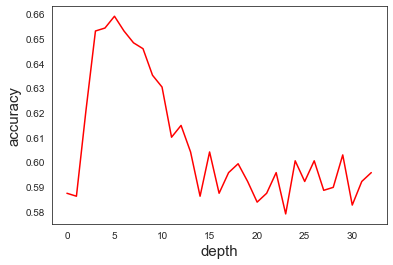

In [132]:
plt.plot(scores, "r")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [133]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 5


This graph above shows that the Depth maximizing the best the accuracy is **5**. So it means the best Decision Tree is when the iteration stops after the 5th one.
# verifier avec alex

In [134]:
clfMaxHS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [135]:
clfMaxHS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [136]:
clfMaxHS.score(X_test,y_test)

0.6590909090909091

In [137]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.10570469798657718
0.040410519563822966


### Interpretation of the precision recall:

>We have a precision of 10.57%, so over all the predicted Home wins we have 68.46% of them that actually were Home wins.
>Only 4.04% of the Home wins have been correctly identified.

The Decision Tree model with Match statistics does not predict well the Home wins, compared to the Logistic Regression Model with Odds.

# a reverifier

**Match Statistics for Draw**

In [138]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_D"])

In [139]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [140]:
clfDS = DecisionTreeClassifier(criterion='entropy')

In [141]:
clfDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [142]:
# test accuracy
clfDS.score(X_test,y_test)

0.6255980861244019

In [143]:
# depth of the decision tree
clfDS.get_depth()

34

In [144]:
scores = [clfDS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

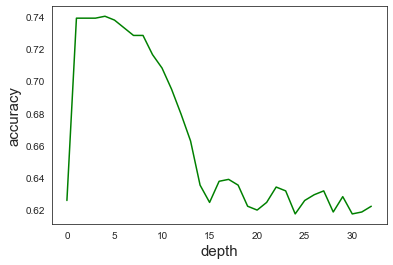

In [145]:
plt.plot(scores,"g")
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [146]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


This graph above shows that the Depth maximizing the best the accuracy is **4**. So it means the best Decision Tree is when the iteration stops after the 4th one.
# verifier avec alex

In [147]:
clfMaxDS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [148]:
clfMaxDS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
clfMaxDS.score(X_test,y_test)

0.7404306220095693

In [150]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.20973154362416108
0.15262515262515264


### Interpretation of the precision recall:

>We have a precision of 20.97%, so over all the predicted Draw we have 20.97% of them that actually were Draws.
>Only 15.26% of the Draws have been correctly identified.

The Decision Tree model with Match statistics does not predict well the Draws, compared to the Logistic Regression Model with Odds.

# a reverifier

**Match Statistics for Away**

In [151]:
feature_names = ['Home ex-Rank', 'Home Team Shots', 'Away ex-Rank', 'Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Corners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']

X = np.array(data[feature_names])
y = np.array(data["Match Result_A"])

In [152]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [153]:
clfAS = DecisionTreeClassifier(criterion='entropy')

In [154]:
clfAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [155]:
# test accuracy
clfAS.score(X_test,y_test)

0.7009569377990431

In [156]:
# depth of the decision tree
clfAS.get_depth()

23

In [157]:
scores = [clfAS.score(X_test,y_test)]
for d in range(1, Depth):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

Text(0.5, 0, 'depth')

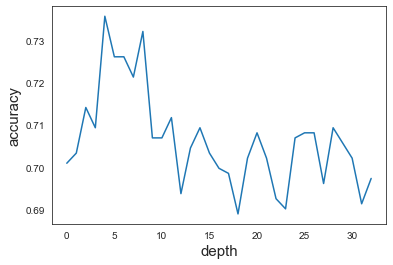

In [158]:
plt.plot(scores)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('depth', fontsize=15)

In [159]:
Max_Depth = np.argmax(scores)
print("The optimal Maximum Depth is", Max_Depth)

The optimal Maximum Depth is 4


This graph above shows that the Depth maximizing the best the accuracy is **4**. So it means the best Decision Tree is when the iteration stops after the 4th one.
# verifier avec alex

In [160]:
clfMaxAS = DecisionTreeClassifier(criterion='entropy', max_depth=Max_Depth)

In [161]:
clfMaxAS.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
clfMaxAS.score(X_test,y_test)

0.7356459330143541

In [163]:
 from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Precision = precision_score(y_train, y_pred)

print(Precision)


Recall = recall_score(y_train, y_pred)


print(Recall)

0.6845637583892618
0.42411642411642414


### Interpretation of the precision recall:

>We have a precision of 68.46%, so over all the predicted Away wins we have 68.46% of them that actually were Away wins.
>Only 42.41% of the Away wins have been correctly identified.

The Decision Tree model with Match statistics does not predict well the Away wins, compared to the Logistic Regression Model with Odds.

# a reverifier

# Conclusion

After doing this Data analysis, we figured out that it can be very complex to predict a match result, and to build a betting strategy on it. So, this Notebook will mostly gives insights on "where it is better to not bet" rather than establishing a strong betting strategy. 

While comparing the two different classification models (Logistic Regression vs Decision Trees) with two different equations (Odds vs Match statistics), we discovered the following interesting points:

> Firstly, we observed that the predictions using the games’ statistics are significantly better than the ones with the odds. It is also important to keep in mind that we used the statistics of an already played game, and we did not use Time Series. 

> Secondly, using two different equations helped us to understand that odds does not perfectly represent a prediction of a match. Effectively, Betting websites are a lot playing with the odds' numbers in order to push people to bet on specific match's results. They do not only take account of the statistics of the match, but they also use the players'emotions to incite the people to play.

> Thirdly, we saw that the Logistic Regression shows most of the time a better accuracy rate than the Decision Tree method. However, it is better to use Decision Trees when we have an inequality in the distribution of the outputs (match's result). Even if the precision and recall are not good, we are still able to calculate them with the Decision Trees while it is not possible with the Logistic Regression (no results found).

To conclude, we observed significant results doing this analysis. We understood which Classification model is better to use for each different data's distribution. We also figured out that, people who wants to bet, should use the match statistics rather than odds to do their predictions.
A company could use this notebook to build a website selling forecasts of match, for players.

**Retrospective on the project**

With more time and deeper knowledge of data analytics with Python, we could have improved this model. For example, by adding other variables like the actual market value of each team, we could have better this model. Even by adding a real time ranking of each team, it would surely precise the model. Finally, we could have used time series to use the previous statistics of a match, or also add some conditions to select some specific bets.